# INGEST

In [1]:
import numpy as np
import random
import pandas as pd
import time
import string
import sys
import matplotlib.pyplot as plt

# GENERATE DATA

In [2]:
# Set random seed. 
np.random.seed(12345)

# Set string length. 
number = 50

# Set list length. 
n=[200, 400, 600, 800, 1000]

# Generate a list with random string characters. 
total_array_string = []
for i in range(0, len(n)):
    array = [''.join(random.choices(string.ascii_letters, k=number)) for _ in range (n[i])]
    total_array_string.append(array)

# DEFINE FUNCTIONS

In [3]:
# Quick sort recursive algorithm. 
def quicksort(array):
    if len(array) < 2:
        return array
    else:
        pivot = array[0]
        less = [i for i in array[1:] if i <= pivot]
        greater = [i for i in array[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

In [4]:
# Merge sort recursive algorithm. 
def mergesort(array):
    if len(array) > 1:
        mid = len(array)//2
        L = array[:mid]
        R = array[mid:]
        mergesort(L)
        mergesort(R)
        
        i = 0
        j = 0
        k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                array[k] = L[i]
                i += 1
            else:
                array[k] = R[j]
                j += 1 
            k += 1
            
        while i < len(L):
            array[k] = L[i]
            i += 1
            k += 1
        
        while j < len(R):
            array[k] = R[j]
            j += 1
            k += 1

In [5]:
# Bubble sort iterative algorithm.
def bubblesort(array):
    for i in range(len(array)-1):
        for j in range(0, len(array)-i-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]

In [6]:
# Insertion sort iterative algorithm.
def insertionsort(array):
    for i in range(1, len(array)):
        key = array[i]
        j = i-1
        
        while j >=0 and key < array[j]:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = key

In [7]:
# Record sorting runtime functions. 
def runtime(sort_function, array):
    time_list=[]
    for i in range(0, len(array)):
        start_time = time.perf_counter()
        sort_time = sort_function(array[i])
        end_time = time.perf_counter()
        time_list.append((end_time - start_time) * 1000)
    return time_list

In [8]:
# Copy lists and call functions. 
quicksort_total_array = total_array_string.copy()
quick_time = runtime(quicksort, quicksort_total_array)

insertionsort_total_array = total_array_string.copy()
insertion_time = runtime(insertionsort, insertionsort_total_array)

bubblesort_total_array = total_array_string.copy()
bubble_time = runtime(bubblesort, bubblesort_total_array)

mergesort_total_array = total_array_string.copy()
merge_time = runtime(mergesort, mergesort_total_array)

# TABLE AND GRAPH

In [9]:
# Create a list with Numpy. 
data = np.array([n,quick_time, merge_time, bubble_time, insertion_time]).T

# Convert the list to a dataframe with Pandas. 
df = pd.DataFrame(data)
df.columns = ['List Length', 'Quick Sort Runtime(ms)', 'Merge Sort Runtime(ms)', 'Bubble Sort Runtime(ms)', 'Insertion Sort Runtime(ms)']
display(df)

,List Length,Quick Sort Runtime(ms),Merge Sort Runtime(ms),Bubble Sort Runtime(ms),Insertion Sort Runtime(ms)
0,200.0,0.3004,0.4233,1.5040,1.3740
1,400.0,0.7881,0.8817,5.9630,5.0072
2,600.0,1.0282,1.4659,14.2352,12.9876
3,800.0,1.3626,1.7617,26.5691,23.2335
4,1000.0,1.8188,2.3055,40.8241,34.3844


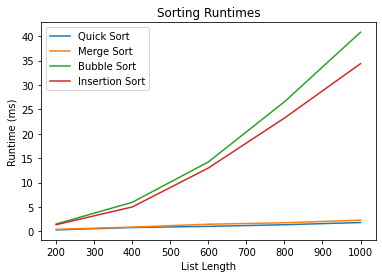

In [10]:
# Create a graph based on the dataframe. 
plt.plot(df['List Length'], df['Quick Sort Runtime(ms)'],label='Quick Sort')
plt.plot(df['List Length'], df['Merge Sort Runtime(ms)'],label='Merge Sort')
plt.plot(df['List Length'], df['Bubble Sort Runtime(ms)'],label='Bubble Sort')
plt.plot(df['List Length'], df['Insertion Sort Runtime(ms)'],label='Insertion Sort')
plt.xlabel('List Length')
plt.ylabel('Runtime (ms)')
plt.title('Sorting Runtimes')
plt.legend()

# CONCLUSION

There are four type of soring algorithms used in this practice: quick sort, merge sort, bubble sort and insertion sort. 
The logics behind each sorting algorithms is as per below:

- Quick Sort: Select an element as pivot, which is actually the 1st element in our algorithm. Then divide the list into 2 lists based on the pivot, with one list containing elements smaller than the pivot, while the other list are with bigger elements than the pivot. Again, we would like picking the first element as the pivot for each of the sub-lists, contine partioning.The smaller sub-lists are always on the left, while the biiger sub-lists are on the right. 

- Merge Sort: A sorting list is broken into 2 smaller lists midway. Then continue breaking the sub-lists into smaller lists, until there are multiple sub-lists with single element in them, which are considered as sorted lists. Then, we merge all these sorted sub-lists back to form one sorted list. 

- Bubble Sort: Compare all element one by one and sort them based on their values. In our algorithm, this process starts from the first element. If the 1st element with index of 0 is greater than the 2nd element with index of 1, we will sway their positions. Then we will continue this sorting process for the 2nd and 3rd element, and 3rd and 4th element, and so on. Once this is complete, then we will get the largest element sorted at the last index of (n-1). We would iterate this process until (n-2)th and (n-1)th element, which would result in the 2nd largest element at the index of (n-2). Repeating this iteration can result in a sorted list.

- Insertion Sort: Compare the 2nd element with index of 1 as key with the 1st element. If the 2nd element is smaller, insert the key (2nd element in this case) before the 1st element. Then we will compare the 3rd element as key value with its previous element, and insert the key if the 3rd element is smaller than the 2nd element. We will repeat this iteration until the list is sorted. 

The big O notations and explainations for each sorting algorithm is shown as per below:
- Quick Sort: O(nlog(n)) on average case with a small constant, while O(n^2) as worst case. 
- Merge Sort: O(nlog(n)) with a larger constant than Quick Sort's. 
- Bubble Sort: O(n^2) with a large constant. 
- Insertion Sort: O(n^2) with a small constant. 

Based on our practice results, we've validated that quick sort and merge sort holds the fastest runtimes out of the 4 algorithms, since they both have the same big O notation of O(nlog(n)). However, from the generated table, we can see quick sort is slightly faster than merge sort, which is due to its smaller contant. This is the reason why people tend to use quick sort more often than merge sort. Bubble sort and insertion are slower comparing to quick sort and merge sort, due to their bigger time complexity of O(n^2). We can see the exponential lines in the graph for them. Bubble sort is slower than insertion sort because of its bigger constant of the big O notation. These 2 sorting algorithms are not as popular as quick sort or merge sort becasue of their slower processing times.  